In [45]:
import pandas as pd
import seaborn as sns


In /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/mpl-data/stylelib/petroff10.mplstyle: This is now an optional IPython functionality, setting rootmodules_cache requires you to install the `pickleshare` library.


In [2]:
penguins = pd.read_csv ("/Users/pajahubalova/Desktop/Python/penguins.csv")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [14]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
penguins.shape

(344, 8)

In [17]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
penguins [(penguins['island'] == 'Dream')]['species'].value_counts()

species
Chinstrap    68
Adelie       56
Name: count, dtype: int64

In [8]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [9]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [11]:
penguins['year'].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

In [12]:
penguins [(penguins['island'] == 'Torgersen')]['sex'].value_counts()

sex
female    24
male      23
Name: count, dtype: int64

In [13]:
penguins_filtered = penguins[(penguins['body_mass_g'] < 3500) & (penguins['flipper_length_mm'] > 200)]
count = penguins_filtered.shape[0]  # Počet odpovídajících tučňáků

print(f"Počet tučňáků s hmotností < 3500 g a délkou křídla > 200 mm: {count}")


Počet tučňáků s hmotností < 3500 g a délkou křídla > 200 mm: 1


In [19]:
#přes describe nalezu základní přehled jako min, max, avg,...ale níže se zabívám přímo agregovanými funkcemi

avg_species = penguins.groupby('species')['body_mass_g'].describe()
avg_species

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


In [29]:
penguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [32]:
penguins.groupby('species')['body_mass_g'].max().sort_values(ascending=False).head(1)

species
Gentoo    6300.0
Name: body_mass_g, dtype: float64

In [25]:

penguins[['species', 'sex']].value_counts()


species    sex   
Adelie     female    73
           male      73
Gentoo     male      61
           female    58
Chinstrap  male      34
           female    34
Name: count, dtype: int64

In [35]:
#The size property returns the number of elements in the DataFrame. Size počítá i Nan values a count pouze bez NaN

penguins.groupby(['species', 'sex']).size()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     female    58
           male      61
dtype: int64

In [43]:
# .agg() při agregaci více sloupečku

aggregated = penguins.groupby('species').agg(
{'flipper_length_mm':['min', 'max']
 }

)


aggregated[("flipper_length_mm", "diff")] = aggregated[("flipper_length_mm", "max")] - aggregated[("flipper_length_mm", "min")]
aggregated



flipper_length_mm             
                        min    max  diff
species                                 
Adelie                172.0  210.0  38.0
Chinstrap             178.0  212.0  34.0
Gentoo                203.0  231.0  28.0

In [44]:
penguins.groupby('species').agg(
    min_flipper_length = ("flipper_length_mm", "min"),
    max_flipper_length = ("flipper_length_mm", "max"),
)

,min_flipper_length,max_flipper_length
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


In [27]:


avg_flippers = penguins.groupby('species')['flipper_length_mm'].describe()
avg_flippers

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,189.953642,6.539457,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,123.0,217.186992,6.484976,203.0,212.0,216.0,221.0,231.0


In [28]:
avg_weight = penguins.groupby('island')['body_mass_g'].describe()
avg_weight

,count,mean,std,min,25%,50%,75%,max
island,,,,,,,,
Biscoe,167.0,4716.017964,782.855743,2850.0,4200.0,4775.0,5325.00,6300.0
Dream,124.0,3712.903226,416.644112,2700.0,3400.0,3687.5,3956.25,4800.0
Torgersen,51.0,3706.372549,445.107940,2900.0,3337.5,3700.0,4000.00,4700.0


/var/folders/fg/w_9tr8ws32v2crqz2rx341z40000gn/T/ipykernel_28432/3074376623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(penguins, x='species', palette='flare')


[Text(0.5, 0, 'vodorovna'), Text(0, 0.5, 'svisla'), Text(0.5, 1.0, 'Graf')]

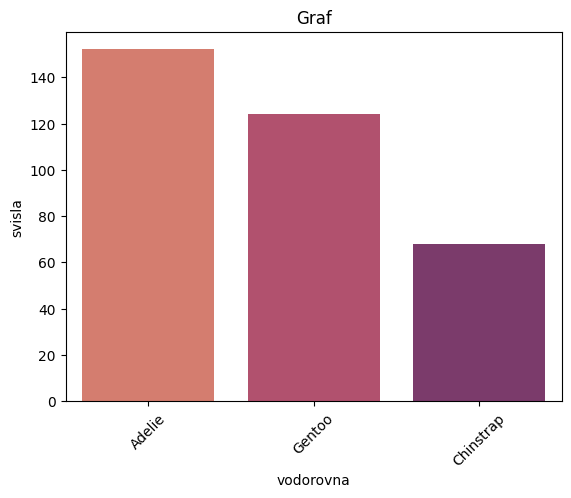

In [51]:
ax = sns.countplot(penguins, x='species', palette='flare') 

ax.tick_params(axis='x', rotation=45)

ax.set(xlabel="vodorovna", ylabel="svisla", title="Graf")

#ax.set(ylabel='Pocet potravin',xlabel='Kategorie',title='Pocet potravin v Kategorii')




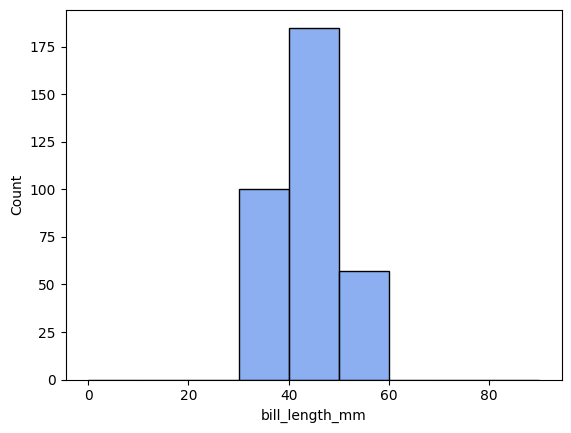

In [62]:
ax = sns.histplot(penguins, 
        x = 'bill_length_mm',
         bins=range(0,100,10),
         color='cornflowerblue'         
                  )

#plt.title('histogram', fontsize=26, fontfamily = 'Arial')

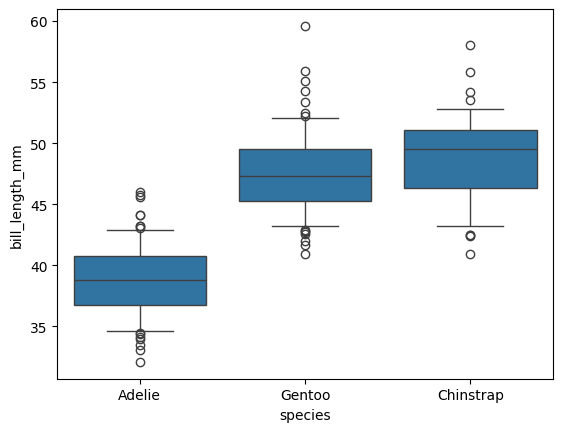

In [63]:
ax = sns.boxplot(penguins, 
                 x='species', 
                 y= 'bill_length_mm', 
                 whis=[5,95])